In [1]:
import cell2cell as c2c

import numpy as np
import pandas as pd

import scipy

from cci_distance_correlation import get_correlation
from ga_results import load_ga_results, organize_ga_results, plot_run_results

import matplotlib.pyplot as plt
from matplotlib_venn import venn2_unweighted
%matplotlib inline

In [2]:
files = dict()
files['output_folder'] = '../Figures/'

# Load Data

In [3]:
ga1 = load_ga_results('../Data/GA/')

../Data/GA/00b38259-fcc5-4b80-ace5-dbdfd1ac182d.json
../Data/GA/015bcbfb-254f-4d44-9f0c-a4cd42e3590a.json
../Data/GA/01f22080-3be6-4008-b872-94fff7e6c8be.json
../Data/GA/05dcee41-23eb-4479-9352-c2384919d030.json
../Data/GA/07fd442e-7fe6-4d4c-b93d-cd9b4c5c0ff9.json
../Data/GA/09e155e0-fdb3-4454-9fd2-c6e6beca8f17.json
../Data/GA/0c3cac41-6dc9-40b8-8d86-2d0b8eb251ef.json
../Data/GA/1565a6c3-ec25-48c3-a876-0e125a8135f8.json
../Data/GA/16454cb9-63ff-4f87-bead-d00da5c3d494.json
../Data/GA/16853cac-daa6-4d5a-a4c2-2f4f52c8e446.json
../Data/GA/1c6adf2c-294e-4a7b-8d9d-e21e6b480104.json
../Data/GA/1c882920-35fa-4340-8b58-37c0c26c52dc.json
../Data/GA/1d303674-1c7f-4cce-b298-a368bcd57b60.json
../Data/GA/1ef12ff3-04d8-4c8b-a9c8-f74eabd6b845.json
../Data/GA/2567b51a-1ff0-4b88-94cc-ab7ae2142ff2.json
../Data/GA/25b04bce-9d46-4112-8f7a-3adf1303e333.json
../Data/GA/2653acf9-8ba2-4ad3-8181-8ce6d76b6273.json
../Data/GA/2707b610-f93d-4010-8ff4-183a1b3af4e6.json
../Data/GA/29618a88-7697-4bf9-9f31-8ee33450a82

In [4]:
ga2 = load_ga_results('../Data/GA2/')

../Data/GA2/0054565f-fa7c-4517-ae47-41f66391fd98.json
../Data/GA2/040b576c-0e38-4d7d-8b05-5a4db7bbd5a3.json
../Data/GA2/0493687c-9b0b-41dc-82ff-902f33a8534a.json
../Data/GA2/0506a8e2-78a8-41b3-aef7-9415707ab8f0.json
../Data/GA2/05dc8647-1387-491a-abad-af9495371c4c.json
../Data/GA2/06ffa4cc-04ff-4548-86fc-7e1d32e5ef0d.json
../Data/GA2/08d29508-9e23-4a5b-9f08-9697df7262c0.json
../Data/GA2/0d9c927d-6670-40a9-a998-6a528203b205.json
../Data/GA2/0da4272a-8cf1-4bc0-b8d0-e441242ce9d0.json
../Data/GA2/1048a6ac-b437-4268-a9c5-22b41afd87c1.json
../Data/GA2/12552e43-79f3-4e86-8a35-e98a1452200f.json
../Data/GA2/14e6abea-4314-4076-a081-95424898cc8c.json
../Data/GA2/16752b51-09b2-4aca-9dd5-f17b1fd802bf.json
../Data/GA2/196a4924-fa6a-49a6-84d2-5f44bb85e024.json
../Data/GA2/1ad72989-c229-4e93-8678-a9dcd7fd0d09.json
../Data/GA2/1d01f168-b559-4aee-b919-a1097caea34f.json
../Data/GA2/254655c1-a141-40f1-aa63-f739283d455b.json
../Data/GA2/261d2523-2d02-4b83-9272-76ab3f0c75db.json
../Data/GA2/26dece57-50ba-4a

In [5]:
lr_ga1 = pd.read_csv('../Data/PPI-Networks/Celegans-GA-Selected-LR-pairs.csv')

In [6]:
lr_ga2 = pd.read_csv('../Data/PPI-Networks/Celegans-GA2-Selected-LR-pairs.csv')

In [7]:
lr_init = pd.read_excel('../Data/PPI-Networks/Celegans-Curated-LR-pairs.xlsx')

# Analysis

**Structure data for visualization**

In [8]:
df_ga1 = organize_ga_results(ga1, initial_corr=0.2068)
df_ga2 = organize_ga_results(ga2, initial_corr=0.2501)

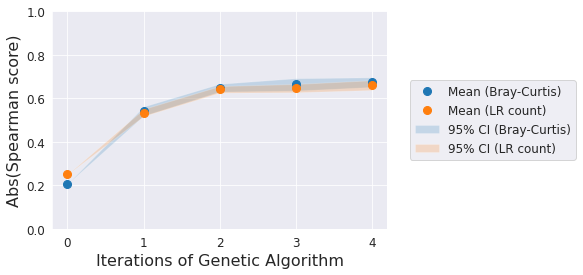

In [9]:
plot_run_results([df_ga1, df_ga2], ['Bray-Curtis', 'LR count'])
plt.savefig(files['output_folder'] + 'Comparison-CCI-scores-GA-runs.pdf',
            dpi=300,
            bbox_inches='tight')

**Compare distributions of optimal correlations from all GA runs**

In [10]:
scipy.stats.mannwhitneyu(ga1[2], ga2[2])

MannwhitneyuResult(statistic=8339.0, pvalue=3.427277273614565e-16)

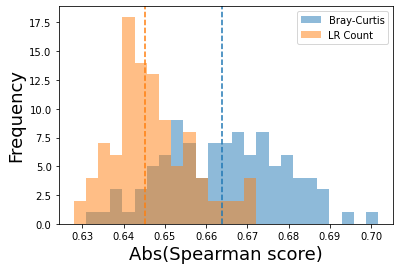

In [11]:
bins = np.histogram(np.hstack((ga1[2], ga2[2])), bins=25)[1]

_ = plt.hist(ga1[2], bins=bins, alpha=0.5, label='Bray-Curtis')
_ = plt.hist(ga2[2], bins=bins, alpha=0.5, label='LR Count')

plt.axvline(x=np.nanmedian(ga1[2]), c='C0', ls='--')
plt.axvline(x=np.nanmedian(ga2[2]), c='C1',ls='--')

plt.legend()
plt.xlabel('Abs(Spearman score)', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

plt.savefig(files['output_folder'] + 'Comparison-CCI-scores-Opt-Dist.pdf',
            dpi=300,
            bbox_inches='tight')

In [12]:
np.nanmedian(ga1[2]), np.nanmedian(ga2[2]) 

(0.6639484646662313, 0.6451763535609416)

**Compare CORE LR pairs**

In [13]:
ligands1 = lr_ga1['Ligand_symbol'].unique().tolist()
ligands2 = lr_ga2['Ligand_symbol'].unique().tolist()

In [14]:
receptors1 = lr_ga1['Receptor_symbol'].unique().tolist()
receptors2 = lr_ga2['Receptor_symbol'].unique().tolist()

In [15]:
lr1 = lr_ga1.apply(lambda row: row['Ligand_symbol'] + ' / ' + row['Receptor_symbol'], axis=1).values.tolist()
lr2 = lr_ga2.apply(lambda row: row['Ligand_symbol'] + ' / ' + row['Receptor_symbol'], axis=1).values.tolist()

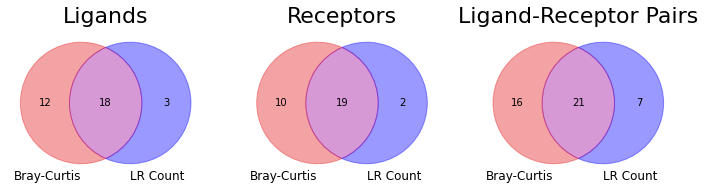

In [16]:
fig, axn = plt.subplots(1, 3, figsize=(12, 4))

pairs = [(ligands1, ligands2), (receptors1, receptors2), (lr1, lr2)]
titles = ['Ligands', 'Receptors', 'Ligand-Receptor Pairs']

for ax, pair, t in zip(axn.flatten(), pairs, titles):
    p1, p2 = pair[0], pair[1]
    vd = venn2_unweighted([set(p1), set(p2)], ('Bray-Curtis', 'LR Count'), alpha=0.4, ax=ax)
    vd.get_patch_by_id('10').set_color('#e41a1c')
    vd.get_patch_by_id('11').set_color('#990099')
    vd.get_patch_by_id('01').set_color('blue')
    ax.set_title(t, size=22)
plt.savefig(files['output_folder'] + 'Comparison-CCI-scores-Core-LRs.pdf',
            dpi=300,
            bbox_inches='tight')

In [17]:
pair = (ligands1, ligands2)
print(*[sorted(set(pair[0]) - set(pair[1])), sorted(set(pair[0]) & set(pair[1])), sorted(set(pair[1]) - set(pair[0]))],
      sep='\n')

['arg-1', 'cle-1', 'dbl-1', 'epi-1', 'hsp-1', 'ins-25', 'lag-2', 'srp-7', 'sup-17', 'unc-10', 'unc-129', 'unc-6']
['K05F1.5', 'col-99', 'cwn-1', 'daf-7', 'grd-11', 'let-2', 'let-756', 'lin-44', 'mab-20', 'mec-5', 'mnr-1', 'mom-2', 'nid-1', 'qua-1', 'rig-6', 'smp-1', 'smp-2', 'wrt-5']
['dsl-5', 'egl-20', 'svh-1']


In [18]:
pair = (receptors1, receptors2)
print(*[sorted(set(pair[0]) - set(pair[1])), sorted(set(pair[0]) & set(pair[1])), sorted(set(pair[1]) - set(pair[0]))],
      sep='\n')

['C27B7.7', 'F14B4.1', 'cam-1', 'daf-2', 'gpn-1', 'lin-12', 'lon-2', 'sma-10', 'unc-29', 'unc-5']
['cfz-2', 'ddr-1', 'dma-1', 'glp-1', 'ina-1', 'lin-17', 'lin-18', 'mec-10', 'mec-4', 'mig-1', 'pat-3', 'plx-1', 'plx-2', 'ptc-1', 'ptc-3', 'ptp-3', 'sma-6', 'ver-1', 'wrk-1']
['mom-5', 'svh-2']


In [19]:
pair = (lr1, lr2)
print(*[sorted(set(pair[0]) - set(pair[1])), sorted(set(pair[0]) & set(pair[1])), sorted(set(pair[1]) - set(pair[0]))],
      sep='\n')

['arg-1 / lin-12', 'cle-1 / gpn-1', 'cwn-1 / lin-17', 'dbl-1 / lon-2', 'dbl-1 / sma-10', 'epi-1 / pat-3', 'hsp-1 / F14B4.1', 'ins-25 / daf-2', 'lag-2 / glp-1', 'lin-44 / cam-1', 'smp-1 / plx-1', 'srp-7 / F14B4.1', 'sup-17 / glp-1', 'unc-10 / unc-29', 'unc-129 / unc-5', 'unc-6 / C27B7.7']
['K05F1.5 / dma-1', 'col-99 / ddr-1', 'cwn-1 / mig-1', 'daf-7 / sma-6', 'grd-11 / ptc-1', 'let-2 / ina-1', 'let-2 / pat-3', 'let-756 / ver-1', 'lin-44 / cfz-2', 'lin-44 / lin-17', 'mab-20 / plx-2', 'mec-5 / mec-10', 'mec-5 / mec-4', 'mnr-1 / dma-1', 'mom-2 / lin-18', 'nid-1 / ptp-3', 'qua-1 / ptc-3', 'rig-6 / wrk-1', 'smp-2 / plx-1', 'smp-2 / plx-2', 'wrt-5 / ptc-1']
['dsl-5 / glp-1', 'egl-20 / mig-1', 'lin-44 / mig-1', 'mom-2 / mig-1', 'mom-2 / mom-5', 'smp-1 / plx-2', 'svh-1 / svh-2']


**Stats for initial list of LR pairs**

In [20]:
lr_init['Ligand_symbol'].unique().shape

(127,)

In [21]:
lr_init['Receptor_symbol'].unique().shape

(66,)

In [22]:
lr_init.shape

(245, 9)